In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

import os

In [3]:
data = pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\screentime_analysis.csv')

In [4]:
data.sample(10)

,Date,App,Usage (minutes),Notifications,Times Opened
12,2024-08-04,Instagram,118,69,28
127,2024-08-01,Netflix,108,0,2
184,2024-08-14,LinkedIn,19,2,5
56,2024-08-23,WhatsApp,56,145,30
170,2024-08-20,Facebook,26,16,34
10,2024-08-25,Instagram,32,60,21
197,2024-08-18,LinkedIn,19,2,5
183,2024-08-25,LinkedIn,22,10,1
93,2024-08-03,8 Ball Pool,13,5,8
133,2024-08-17,Netflix,106,1,3


In [5]:
data.describe()

,Usage (minutes),Notifications,Times Opened
count,200.000000,200.000000,200.00000
mean,37.750000,28.735000,21.63000
std,29.711299,35.801726,24.27301
min,1.000000,0.000000,1.00000
25%,17.000000,1.750000,4.00000
50%,26.000000,11.500000,10.00000
75%,51.250000,47.000000,32.00000
max,119.000000,147.000000,99.00000


In [6]:
data.select_dtypes('object').describe()

,Date,App
count,200,200
unique,30,8
top,2024-08-26,Instagram
freq,16,25


In [7]:
data.shape

(200, 5)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             200 non-null    object
 1   App              200 non-null    object
 2   Usage (minutes)  200 non-null    int64 
 3   Notifications    200 non-null    int64 
 4   Times Opened     200 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 7.9+ KB


In [9]:
data.isnull().sum()

Date               0
App                0
Usage (minutes)    0
Notifications      0
Times Opened       0
dtype: int64

In [10]:
data.columns = data.columns.str.lower()

In [11]:
#convert date column to datetime type
data['date'] = pd.to_datetime(data['date'])

#Split datetime but in this case we don't need month and year as this dataset only contains month of October, year 2024.
data['day'] = data['date'].dt.day

del data['date']

In [12]:
data['day'].value_counts().head()

day
26    16
30    12
3     11
1     10
23     9
Name: count, dtype: int64

In [13]:
data [ data['day'] == 26]

,app,usage (minutes),notifications,times opened,day
2,Instagram,112,33,17,26
6,Instagram,51,58,41,26
23,Instagram,118,69,59,26
36,X,37,18,11,26
38,X,24,17,23,26
45,X,37,32,11,26
58,WhatsApp,51,119,61,26
117,Safari,5,1,5,26
119,Safari,1,2,2,26
126,Netflix,62,0,4,26


In [14]:
data = data.groupby(['day','app'])[['usage (minutes)','notifications','times opened']].sum().reset_index()

In [15]:
data.sample(5)

,day,app,usage (minutes),notifications,times opened
116,27,Facebook,47,93,73
84,20,WhatsApp,130,228,146
66,16,Instagram,44,71,54
90,22,LinkedIn,7,8,9
80,20,Facebook,54,83,59


day                   Axes(0.125,0.11;0.168478x0.77)
usage (minutes)    Axes(0.327174,0.11;0.168478x0.77)
notifications      Axes(0.529348,0.11;0.168478x0.77)
times opened       Axes(0.731522,0.11;0.168478x0.77)
dtype: object

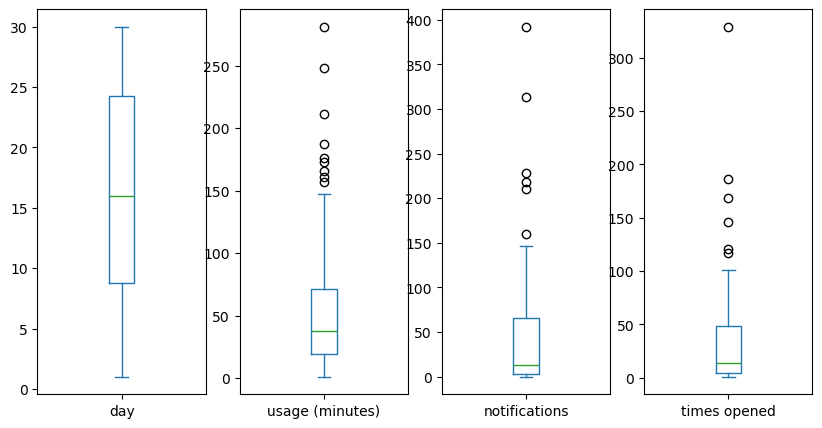

In [16]:
data.plot(kind='box', figsize=(10,5), subplots=True)

In [17]:
data [ data['usage (minutes)'] > 150]

,day,app,usage (minutes),notifications,times opened
10,3,Netflix,176,1,8
42,10,Netflix,187,2,4
72,17,WhatsApp,166,313,329
75,18,Instagram,157,115,64
78,19,Netflix,248,1,9
87,21,Instagram,211,110,70
99,24,Netflix,161,0,5
109,26,Instagram,281,160,117
111,26,Netflix,173,0,10


In [18]:
data [ data['notifications'] > 150]


,day,app,usage (minutes),notifications,times opened
72,17,WhatsApp,166,313,329
79,19,WhatsApp,66,218,121
84,20,WhatsApp,130,228,146
92,22,WhatsApp,81,210,169
97,23,WhatsApp,129,392,186
109,26,Instagram,281,160,117


In [19]:
data [ data['times opened'] > 100]

,day,app,usage (minutes),notifications,times opened
65,16,Facebook,136,95,101
72,17,WhatsApp,166,313,329
79,19,WhatsApp,66,218,121
84,20,WhatsApp,130,228,146
92,22,WhatsApp,81,210,169
97,23,WhatsApp,129,392,186
109,26,Instagram,281,160,117
118,27,WhatsApp,110,145,101


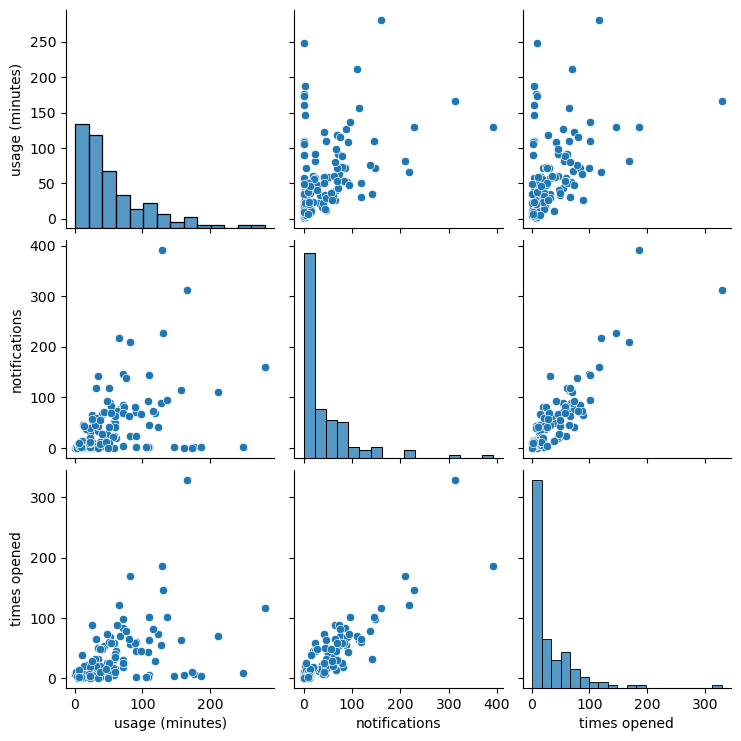

In [20]:
sns.pairplot(data[['usage (minutes)','notifications','times opened']])

C:\Users\dell\AppData\Local\Temp\ipykernel_17048\590150572.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(app_dist, x=app_dist.index, y='counts', palette='flare')


Text(0.5, 1.0, 'Frequency of Apps')

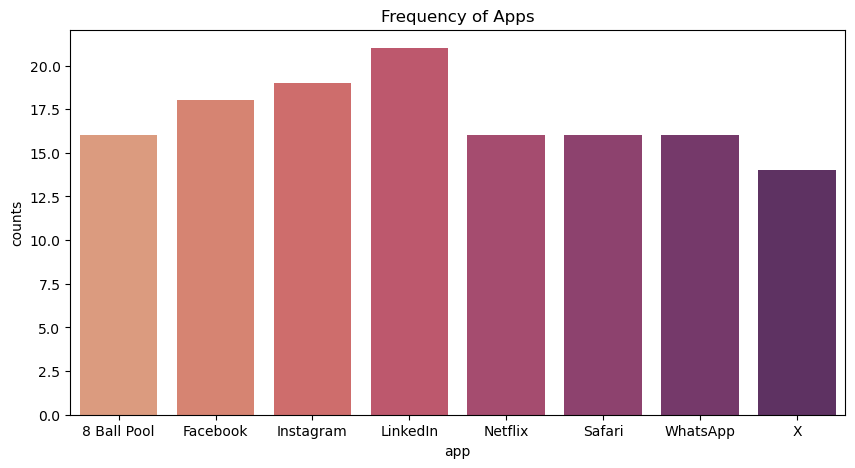

In [21]:
plt.figure(figsize=(10,5))
app_dist = pd.crosstab(data['app'], columns='counts')
sns.barplot(app_dist, x=app_dist.index, y='counts', palette='flare')
plt.title('Frequency of Apps')

C:\Users\dell\AppData\Local\Temp\ipykernel_17048\2306034943.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(day_usage, x=day_usage.index, y='usage (minutes)', palette='flare')


Text(0.5, 1.0, 'Total Usage (minutes) per Day')

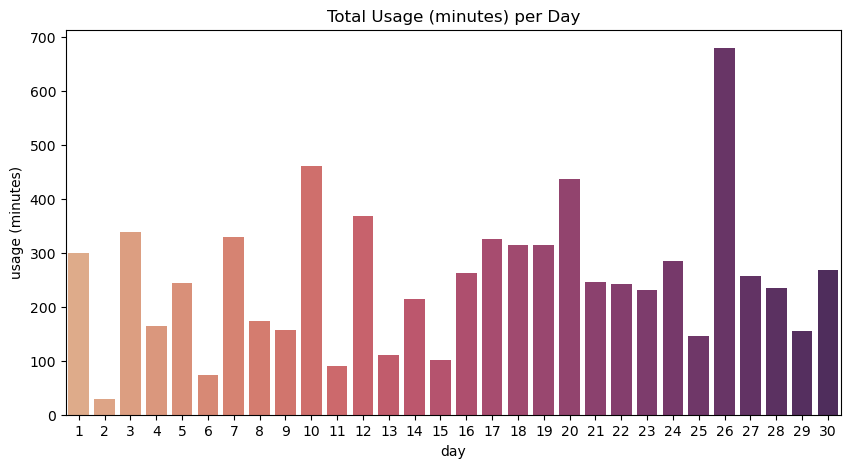

In [22]:
day_usage = pd.DataFrame(data.groupby('day')['usage (minutes)'].sum())

plt.figure(figsize=(10,5))
sns.barplot(day_usage, x=day_usage.index, y='usage (minutes)', palette='flare')
plt.title('Total Usage (minutes) per Day')

C:\Users\dell\AppData\Local\Temp\ipykernel_17048\2401289905.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=day_notif, x=day_notif.index, y='notifications', palette='flare')


Text(0.5, 1.0, 'Toal no.of Notifications per Day')

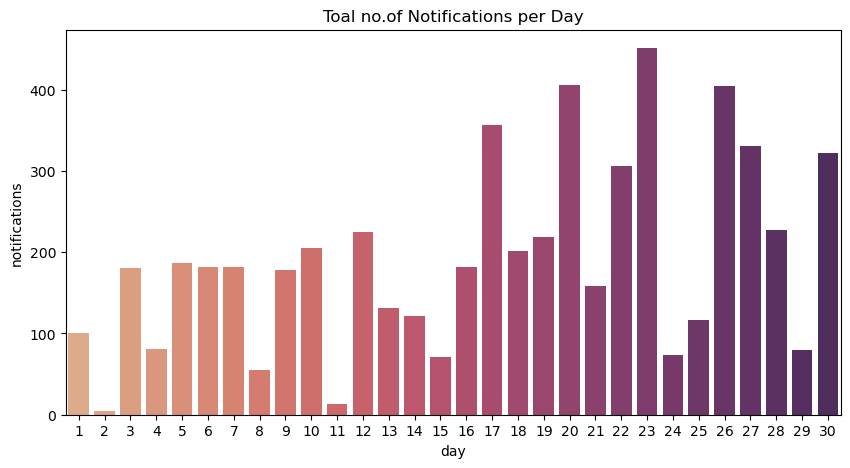

In [23]:
day_notif = pd.DataFrame(data.groupby('day')['notifications'].sum())

plt.figure(figsize=(10,5))
sns.barplot(data=day_notif, x=day_notif.index, y='notifications', palette='flare')
plt.title('Toal no.of Notifications per Day')

C:\Users\dell\AppData\Local\Temp\ipykernel_17048\1275411829.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=day_open, x=day_open.index, y='times opened', palette='flare')


Text(0.5, 1.0, 'Total no.of Times Open per Day')

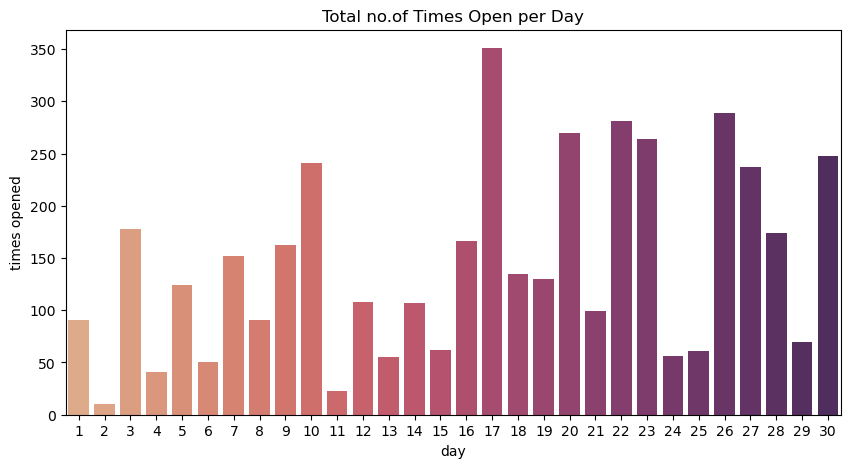

In [25]:
day_open = pd.DataFrame(data.groupby('day')['times opened'].sum())

plt.figure(figsize=(10,5))
sns.barplot(data=day_open, x=day_open.index, y='times opened', palette='flare')
plt.title('Total no.of Times Open per Day')

C:\Users\dell\AppData\Local\Temp\ipykernel_17048\3588780313.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=app_usage, y='usage (minutes)', x=app_usage.index, palette='flare')


Text(0.5, 1.0, 'Apps by Usage (min.)')

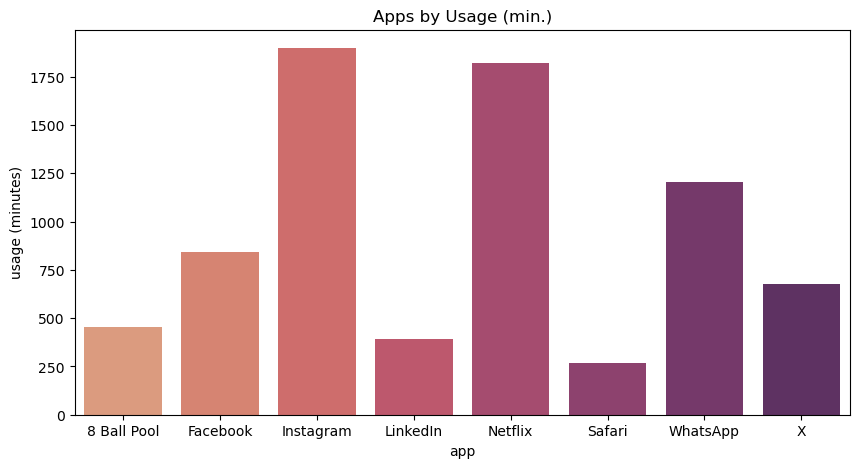

In [26]:
app_usage = pd.DataFrame(data.groupby('app')['usage (minutes)'].sum())

plt.figure(figsize=(10,5))
sns.barplot(data=app_usage, y='usage (minutes)', x=app_usage.index, palette='flare')
plt.title('Apps by Usage (min.)')

C:\Users\dell\AppData\Local\Temp\ipykernel_17048\228808288.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=app_notif, y='notifications', x=app_notif.index, palette='flare')


Text(0.5, 1.0, 'Apps by no. of Notifications')

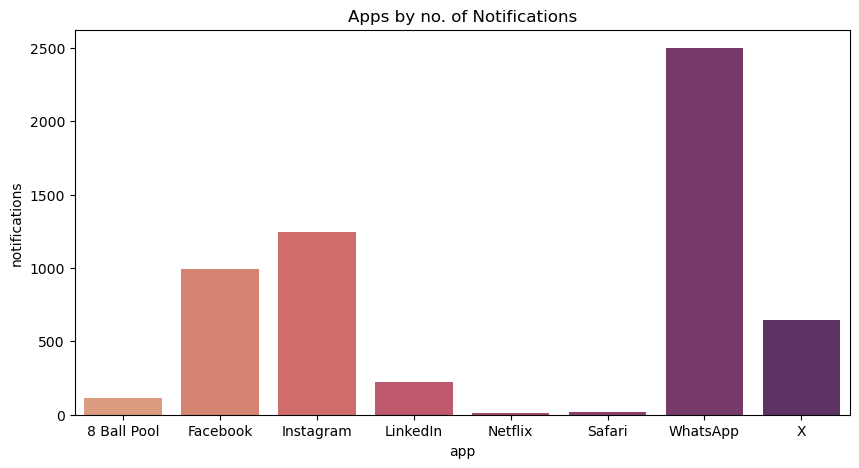

In [27]:
app_notif = pd.DataFrame(data.groupby('app')['notifications'].sum())

plt.figure(figsize=(10,5))
sns.barplot(data=app_notif, y='notifications', x=app_notif.index, palette='flare')
plt.title('Apps by no. of Notifications')

C:\Users\dell\AppData\Local\Temp\ipykernel_17048\216898382.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=app_open, y='times opened', x=app_open.index, palette='flare')


Text(0.5, 1.0, 'Apps by no. of Opens')

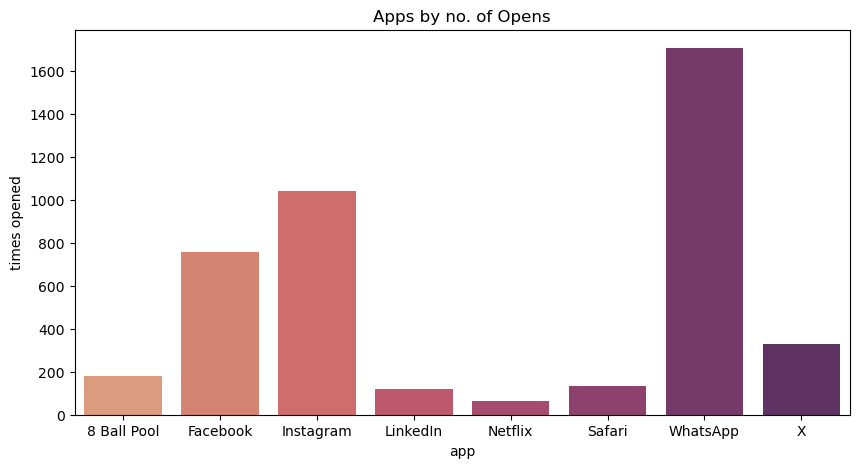

In [28]:
app_open = pd.DataFrame(data.groupby('app')['times opened'].sum())

plt.figure(figsize=(10,5))
sns.barplot(data=app_open, y='times opened', x=app_open.index, palette='flare')
plt.title('Apps by no. of Opens')

<Axes: >

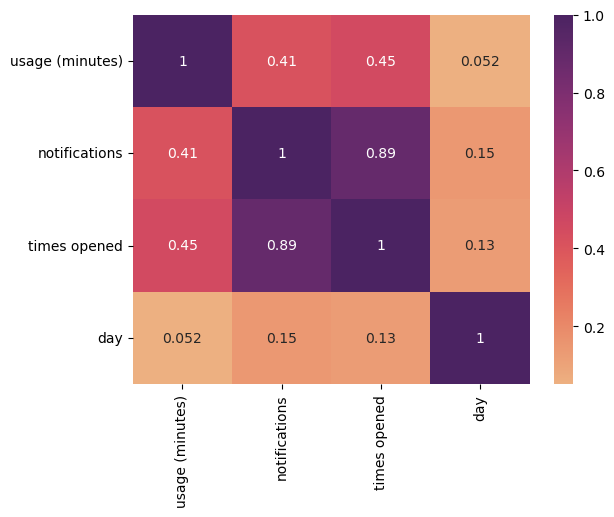

In [29]:
sns.heatmap(data[['usage (minutes)','notifications','times opened', 'day']].corr(), 
            annot=True, 
            cmap='flare')

In [30]:
app_dummy = pd.get_dummies(data['app'], drop_first=True).astype(int)

model_data = pd.concat([data, app_dummy], axis=1)
del model_data['app']

In [31]:
x = model_data[['notifications', 'times opened', 'Facebook',
       'Instagram', 'LinkedIn', 'Netflix', 'Safari', 'WhatsApp', 'X']]
y = model_data['usage (minutes)']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.9, random_state=42)

In [32]:
gb_model = GradientBoostingRegressor(n_estimators=50, 
                                     max_features=4, 
                                     random_state=42)
gb_model.fit(x_train, y_train)

gb_predicted = gb_model.predict(x_test)

gb_score = gb_model.score(x_test, y_test)
gb_mae = mean_absolute_error(y_test, gb_predicted)

gb_df = { 'model': ['Gradient Boosting Regressor'], 'r2':[gb_score], 'mae':[gb_mae] }
gb_df = pd.DataFrame(gb_df)

gb_df

,model,r2,mae
0,Gradient Boosting Regressor,0.867773,10.007509


In [33]:
rf_model = RandomForestRegressor(n_estimators=50, 
                                 max_features=4, 
                                 oob_score=True,
                                 random_state=42)
rf_model.fit(x_train, y_train)

rf_predicted = rf_model.predict(x_test)

rf_score = rf_model.score(x_test, y_test)
rf_mae = mean_absolute_error(y_test, rf_predicted)
rf_oob = rf_model.oob_score_

rf_df = { 'model': ['Random Forest'], 'r2':[rf_score], 'mae':[rf_mae], 'oob_score_':[rf_oob] }
rf_df = pd.DataFrame(rf_df)

rf_df

,model,r2,mae,oob_score_
0,Random Forest,0.87498,10.556143,0.616081


In [34]:
merge_model = pd.merge(gb_df, rf_df, on=['model','r2', 'mae'], how='outer')

merge_model.index = merge_model['model']

del merge_model['model']
merge_model

,r2,mae,oob_score_
model,,,
Gradient Boosting Regressor,0.867773,10.007509,NaN
Random Forest,0.874980,10.556143,0.616081
